# YOLOv3 Object Detection
05/31/2019

YOLOv3 Object Detector in Keras with TensorFlow backend. This notebook uses a YOLOv3 network, pre-trained on the ImageNet and Microsoft COCO datasets.
OpenCV (CV2) used for reading and saving images.

Using libraries YOLOv3 from
* https://pjreddie.com/darknet/yolo/
* https://github.com/experiencor/keras-yolo3



# YOLOv3 Concepts

## Image Grid

## Anchor boxes

## Bounding boxes

## Training data


In [1]:
# Using TensorFlow 1.13.1
# YOLOv3 Keras code for TF 1.x; not compatible with TF 2.0 alpha

import numpy as np
import os
import matplotlib.pyplot as plt
from datetime import datetime

# Install CV2 with `pip install opencv-python`, rather than Anaconda
import cv2

import tensorflow as tf
import tensorflow.keras as keras

print("TensorFlow:", tf.__version__, " Keras:", keras.__version__, " CV2:", cv2.__version__)

TensorFlow: 1.13.1  Keras: 2.2.4-tf  CV2: 4.1.0


## Define and load the Keras YOLOv3 model (106 layers)

### Import Keras model experiencor/keras-yolo3
* https://github.com/experiencor/keras-yolo3

Main functions used:

    yolov3 = make_yolov3_model()
    weight_reader = WeightReader(weights_path)
    weight_reader.load_weights(yolov3)

It takes about 1 minute to load YOLO model (Intel i7 quad-core 2.8 GHz)

    CPU times: user 54.4 s, sys: 1.97 s, total: 56.3 s
    Wall time: 55.6 s


In [2]:
# Import experiencor/keras-yolo3 library (some code changes for error debugging)
from keras_yolo3 import yolo3_one_file_to_detect_them_all as xp_yolov3

# YOLOv3 main() #1 
# args.weights
weights_path = '/Users/nelson/dev/cv/yolov3-keras/models/yolov3.weights'
# args.image
image_path = './data/images/african_elephant_people.jpg'  # sample image

# make the yolov3 model to predict 80 classes on COCO
print("make_yolov3_model:")
yolov3 = xp_yolov3.make_yolov3_model()
print()

# define weights reader
weight_reader = xp_yolov3.WeightReader(weights_path)

make_yolov3_model:
Instructions for updating:
Colocations handled automatically by placer.


Using TensorFlow backend.


## YOLOv3 - load weights 


In [3]:
# YOLOv3 - load the weights trained on MS-COCO into the model
print("load_weights(yolov3):")
%time weight_reader.load_weights(yolov3)

load_weights(yolov3):
loading weights of convolution #0
loading weights of convolution #1
loading weights of convolution #2
loading weights of convolution #3
no convolution #4
loading weights of convolution #5
loading weights of convolution #6
loading weights of convolution #7
no convolution #8
loading weights of convolution #9
loading weights of convolution #10
no convolution #11
loading weights of convolution #12
loading weights of convolution #13
loading weights of convolution #14
no convolution #15
loading weights of convolution #16
loading weights of convolution #17
no convolution #18
loading weights of convolution #19
loading weights of convolution #20
no convolution #21
loading weights of convolution #22
loading weights of convolution #23
no convolution #24
loading weights of convolution #25
loading weights of convolution #26
no convolution #27
loading weights of convolution #28
loading weights of convolution #29
no convolution #30
loading weights of convolution #31
loading weig

In [4]:
# <tensorflow.python.keras.engine.training.Model at 0x14caaf898>
print ("Number of yolov3.layers:", len(yolov3.layers))

Number of yolov3.layers: 252


In [5]:
# YOLOv3 Keras model summary
yolov3.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, None, None, 3 0                                            
__________________________________________________________________________________________________
conv_0 (Conv2D)                 (None, None, None, 3 864         input_1[0][0]                    
__________________________________________________________________________________________________
bnorm_0 (BatchNormalization)    (None, None, None, 3 128         conv_0[0][0]                     
__________________________________________________________________________________________________
leaky_0 (LeakyReLU)             (None, None, None, 3 0           bnorm_0[0][0]                    
__________________________________________________________________________________________________
zero_paddi

## YOLOv3 Notes

    Total yolov3.layers: 252
    Convolutional yolov3.layers: 106
    Three image scales: layers 79-82 (stride 32), 91-94 (stride 16), 103-106 (stride 8)
    Detection layer outputs: conv_81, conv_93, conv_105

    Total params: 62,001,757
    Trainable params: 61,949,149
    Non-trainable params: 52,608


### YOLOv3 Layers (0 - 105)

* See YOLOv3 Keras model definition in `./keras_yolo3/yolo.py`

#### Detection layer outputs

    conv_81 (Conv2D)                (None, None, None, 2 261375      leaky_80[0][0]               conv_93 (Conv2D)                (None, None, None, 2 130815      leaky_92[0][0]               conv_105 (Conv2D)               (None, None, None, 2 65535       leaky_104[0][0]           


## YOLOv3 Summary

#### Sample layers

    <keras.engine.training.Model object at 0xb4a178a58>
    Layer (type)                    Output Shape         Param #     Connected to
    input_3 (InputLayer)            (None, None, None, 3 0 
    conv_0 (Conv2D)                 (None, None, None, 3 864         input_3[0][0]   
    bnorm_0 (BatchNormalization)    (None, None, None, 3 128         conv_0[0][0]
    leaky_0 (LeakyReLU)             (None, None, None, 3 0           bnorm_0[0][0]
    zero_padding2d_11 (ZeroPadding2 (None, None, None, 3 0           leaky_0[0][0]
    ...
    add_47 (Add)                    (None, None, None, 6 0           leaky_1[0][0]                                                                                  leaky_3[0][0]        
    zero_padding2d_12 (ZeroPadding2 (None, None, None, 6 0           add_47[0][0]           
    conv_5 (Conv2D)                 (None, None, None, 1 73728       zero_padding2d_12[0][0]  
    bnorm_5 (BatchNormalization)    (None, None, None, 1 512         conv_5[0][0]            
    leaky_5 (LeakyReLU)             (None, None, None, 1 0           bnorm_5[0][0]           
    ...
    conv_84 (Conv2D)                (None, None, None, 2 131072      leaky_79[0][0]               bnorm_84 (BatchNormalization)   (None, None, None, 2 1024        conv_84[0][0]                 leaky_84 (LeakyReLU)            (None, None, None, 2 0           bnorm_84[0][0]               up_sampling2d_5 (UpSampling2D)  (None, None, None, 2 0           leaky_84[0][0]           
    concatenate_5 (Concatenate)     (None, None, None, 7 0           up_sampling2d_5[0][0]                                                                          add_65[0][0]                 ...
    conv_96 (Conv2D)                (None, None, None, 1 32768       leaky_91[0][0]               bnorm_96 (BatchNormalization)   (None, None, None, 1 512         conv_96[0][0]                 leaky_96 (LeakyReLU)            (None, None, None, 1 0           bnorm_96[0][0]               up_sampling2d_6 (UpSampling2D)  (None, None, None, 1 0           leaky_96[0][0]               concatenate_6 (Concatenate)     (None, None, None, 3 0           up_sampling2d_6[0][0]                                                                          add_57[0][0]                 ...
    conv_102 (Conv2D)               (None, None, None, 2 294912      leaky_101[0][0]               bnorm_102 (BatchNormalization)  (None, None, None, 2 1024        conv_102[0][0]               leaky_102 (LeakyReLU)           (None, None, None, 2 0           bnorm_102[0][0]               conv_103 (Conv2D)               (None, None, None, 1 32768       leaky_102[0][0]               bnorm_103 (BatchNormalization)  (None, None, None, 1 512         conv_103[0][0]               leaky_103 (LeakyReLU)           (None, None, None, 1 0           bnorm_103[0][0]               conv_80 (Conv2D)                (None, None, None, 1 4718592     leaky_79[0][0]               conv_92 (Conv2D)                (None, None, None, 5 1179648     leaky_91[0][0]               conv_104 (Conv2D)               (None, None, None, 2 294912      leaky_103[0][0]               bnorm_80 (BatchNormalization)   (None, None, None, 1 4096        conv_80[0][0]                 bnorm_92 (BatchNormalization)   (None, None, None, 5 2048        conv_92[0][0]                 bnorm_104 (BatchNormalization)  (None, None, None, 2 1024        conv_104[0][0]               leaky_80 (LeakyReLU)            (None, None, None, 1 0           bnorm_80[0][0]               leaky_92 (LeakyReLU)            (None, None, None, 5 0           bnorm_92[0][0]               leaky_104 (LeakyReLU)           (None, None, None, 2 0           bnorm_104[0][0]               conv_81 (Conv2D)                (None, None, None, 2 261375      leaky_80[0][0]               conv_93 (Conv2D)                (None, None, None, 2 130815      leaky_92[0][0]               conv_105 (Conv2D)               (None, None, None, 2 65535       leaky_104[0][0]               


## YOLOv3 Architecture


![YOLOv3 Architecture](./images/YOLOv3_architecture_01.png "YOLOv3 Architecture")

<!-- img src="./images/YOLOv3_architecture_01.png" alt="VGG16 architecture" width="800" -->

**Source**: Ayoosh Kathuria, YOLOv3 &nbsp; &nbsp;
**YOLO**: https://pjreddie.com/yolo/

In [6]:
# YOLO parameters for image pre-processing and object detection

# set some parameters
net_h, net_w = 416, 416
obj_thresh, nms_thresh = 0.5, 0.45
anchors = [[116,90,  156,198,  373,326],  [30,61, 62,45,  59,119], [10,13,  16,30,  33,23]]

# YOLOv3 object classes: 80 MSCOCO classes
labels = ["person", "bicycle", "car", "motorbike", "aeroplane", "bus", "train", "truck",
  "boat", "traffic light", "fire hydrant", "stop sign", "parking meter", "bench",
  "bird", "cat", "dog", "horse", "sheep", "cow", "elephant", "bear", "zebra", "giraffe",
  "backpack", "umbrella", "handbag", "tie", "suitcase", "frisbee", "skis", "snowboard",
  "sports ball", "kite", "baseball bat", "baseball glove", "skateboard", "surfboard",
  "tennis racket", "bottle", "wine glass", "cup", "fork", "knife", "spoon", "bowl", "banana",
  "apple", "sandwich", "orange", "broccoli", "carrot", "hot dog", "pizza", "donut", "cake",
  "chair", "sofa", "pottedplant", "bed", "diningtable","toilet","tvmonitor","laptop","mouse",
  "remote", "keyboard", "cell phone", "microwave", "oven", "toaster", "sink", "refrigerator",
  "book", "clock", "vase", "scissors", "teddy bear", "hair drier", "toothbrush"]


In [7]:
# Sample images
image_path = './keras_yolo3_datasets/BCCD_Dataset/example.jpg'
image_path = './images/zebra.jpg'

image_dir1 = './data/images/'
image_fns1 = ['african_elephant.jpg', 'african_elephant_people.jpg', 'african_elephant_jeep', 
              'zebra.jpg', 'dog.jpg', 'eagle.jpg', 'giraffe.jpg', 'horses.jpg', 
              'kites_people.jpg', 'person.jpg']

# MS-COCO
image_dir2 = '../../datasets/mscoco/val2017/'
image_fns2 = ['000000000285.jpg', '000000000785.jpg', '000000004765.jpg', '000000014380.jpg']

# West Palm Beach
image_dir3 = './data/images/wpb/'
image_fns3 = ['wpb_marina_01.jpg', 'wpb_clematis_01.jpg']

# Art
image_dir4 = './data/images/art/'
image_fns4 = ['dama_sentada.jpg', 'scream.jpg']

image_path = image_dir1+image_fns1[1]
print("image_path:", image_path)

image_path: ./data/images/african_elephant_people.jpg


## YOLOv3 - image pre-processing 

* yolov3.preprocess_input()
* Convert input image to defined width, height (416 x 416)

In [8]:
# YOLOv3 read & preprocess the sample image
image = cv2.imread(image_path)

image_h, image_w, _ = image.shape
new_image = xp_yolov3.preprocess_input(image, net_h, net_w)

image.shape: (1080, 1920, 3) - new_image.shape: (1, 416, 416, 3)


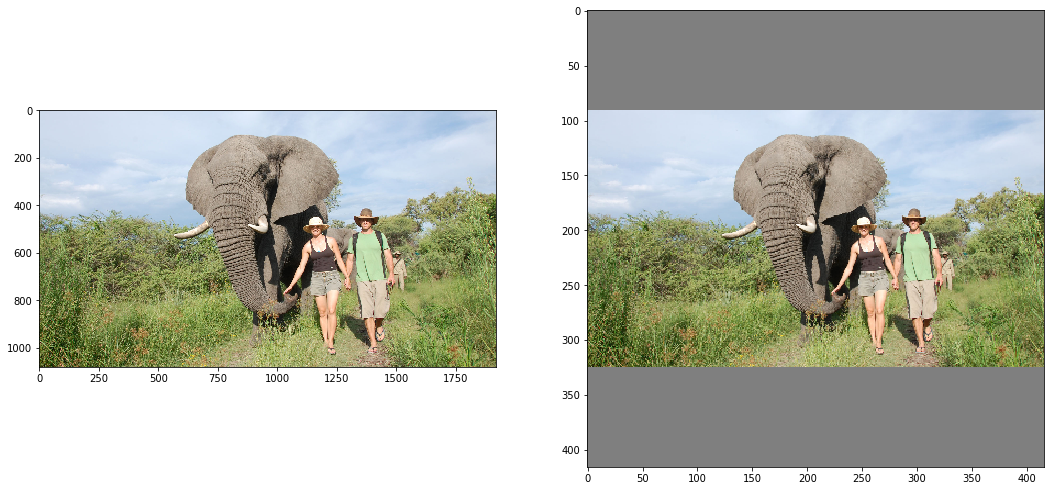

In [9]:
# image, preprocessed new_image

print("image.shape:", image.shape, end=' - ')
print("new_image.shape:", new_image.shape)
plt.figure(figsize=(18,10))
plt.subplot(121)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.subplot(122)
plt.imshow(new_image[0])
plt.show();

In [10]:
# YOLOv3 helper functions

# Read and preprocess image
def yolov3_read_and_show(image_path):
    # image_path = image_dir4+image_fns4[0]
    image = cv2.imread(image_path)
    print("image_path:", image_path)
    print("image.shape:", image.shape)
    # Show image
    plt.figure(figsize=(18,10))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.show();
    return image

# Object detection and display of annotated image
def yolov3_detect_and_show(image, image_path):
    print("YOLOv3 predicting image_path:", image_path)
    image_h, image_w, _ = image.shape
    new_image = xp_yolov3.preprocess_input(image, net_h, net_w)
    yolos = yolov3.predict(new_image)
    boxes = []
    for i in range(len(yolos)):
        boxes += xp_yolov3.decode_netout(yolos[i][0], anchors[i], 
                                         obj_thresh, nms_thresh, net_h, net_w)
    xp_yolov3.correct_yolo_boxes(boxes, image_h, image_w, net_h, net_w)
    xp_yolov3.do_nms(boxes, nms_thresh)     
    xp_yolov3.draw_boxes(image, boxes, labels, obj_thresh) 
    detected_image_path = image_path[:-4] + '_detected' + image_path[-4:]
    cv2.imwrite(detected_image_path, (image).astype('uint8')) 
    # Show detected bounding boxes on image
    image = cv2.imread(detected_image_path)
    plt.figure(figsize=(18,10))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.show()
    return boxes

# Print object predictions and detected image; Multi-class, multi-object proposal per box
def print_predictions(boxes, labels, obj_thresh):
    print("Predictions on image (object threshold: {})".format(obj_thresh))
    obj_num = 0
    for b, box in enumerate(boxes):
        label_str = ''
        label = -1
        for i in range(len(labels)):
            if box.classes[i] > obj_thresh:
                obj_num += 1
                label_str += labels[i]
                label = i
                info_str = 'object ' + str(obj_num) + ' box ' + str(b)
                info_str += ' - ' + labels[i] + ' (class ' + str(i) + '): '
                print(info_str + str(box.classes[i]*100) + '%')
    return obj_num

# YOLOv3 Object Detection - Elephant and people



image_path: ./data/images/african_elephant_people.jpg
image.shape: (1080, 1920, 3)


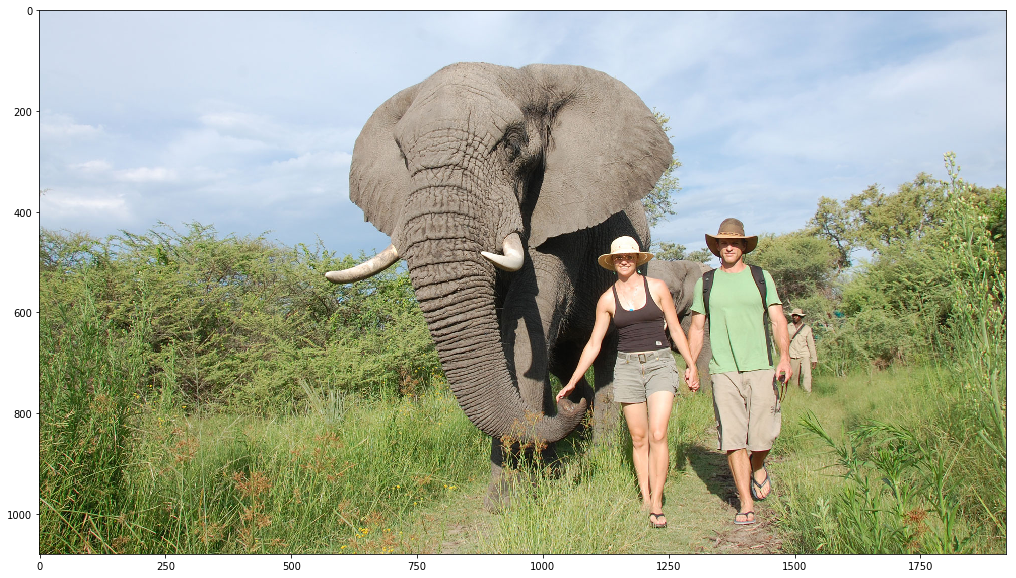

In [11]:
# Elephant image
image_path = image_dir1+image_fns1[1]
# Object detection
image = yolov3_read_and_show(image_path)

YOLOv3 predicting image_path: ./data/images/african_elephant_people.jpg
elephant: 99.82871413230896%
person: 99.97822642326355%
person: 99.86847043037415%


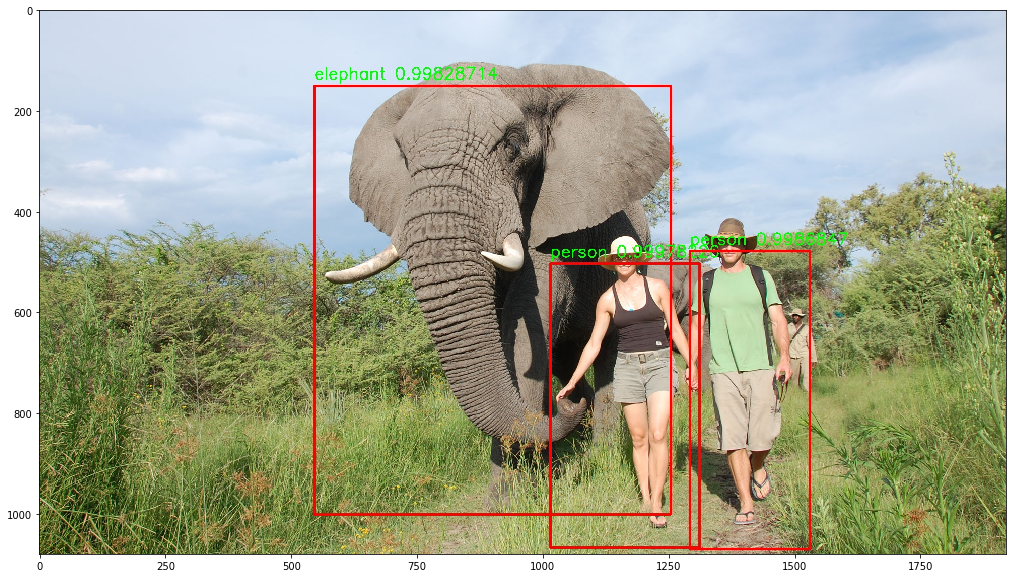

In [12]:
# Object detection
boxes = yolov3_detect_and_show(image, image_path)

In [13]:
# Print yolo boxes and classes
objects_total = print_predictions(boxes, labels, obj_thresh)
print("\nobjects_total:", objects_total)

Predictions on image (object threshold: 0.5)
object 1 box 253 - elephant (class 20): 99.82871413230896%
object 2 box 1724 - person (class 0): 99.97822642326355%
object 3 box 1736 - person (class 0): 99.86847043037415%

objects_total: 3


# YOLOv3 Object Detection - West Palm Beach


image_path: ./data/images/wpb/wpb_clematis_01.jpg
image.shape: (500, 800, 3)


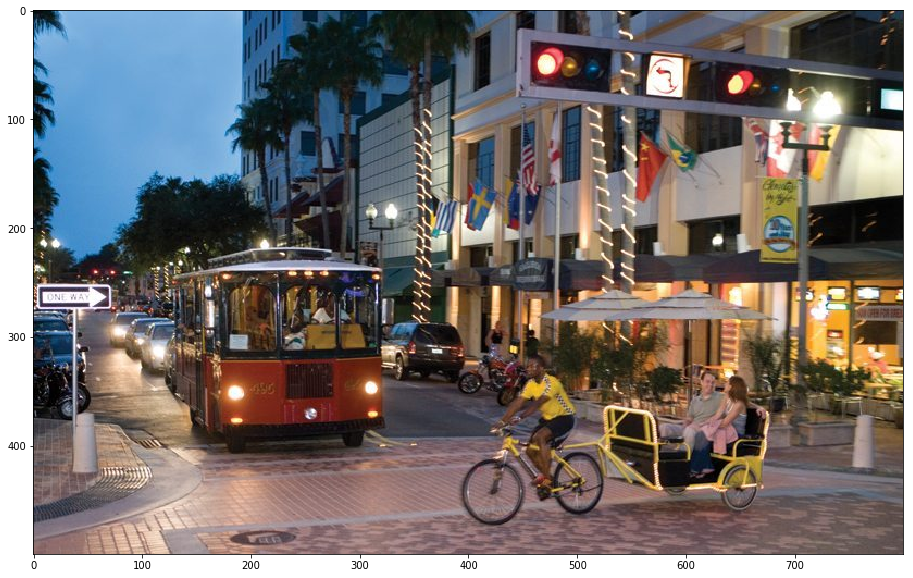

In [14]:
# WPB downtown image
image_path = image_dir3+image_fns3[1]
image = yolov3_read_and_show(image_path)

YOLOv3 predicting image_path: ./data/images/wpb/wpb_clematis_01.jpg
bus: 99.76127743721008%
person: 99.40769672393799%
person: 95.56765556335449%
bicycle: 99.69530701637268%
traffic light: 87.71517276763916%
traffic light: 84.3330442905426%
bus: 63.52843642234802%
car: 68.71739029884338%
car: 97.94415235519409%
car: 91.70721173286438%
motorbike: 67.31112599372864%


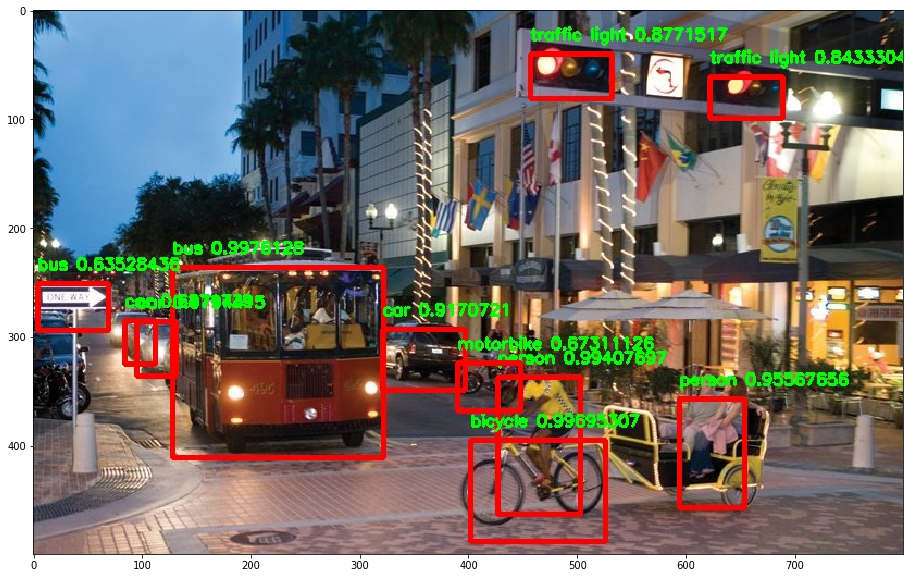

In [15]:
# Object detection
boxes = yolov3_detect_and_show(image, image_path)

In [16]:
# Print yolo boxes and classes
objects_total = print_predictions(boxes, labels, obj_thresh)
print("\nobjects_total:", objects_total)

Predictions on image (object threshold: 0.5)
object 1 box 282 - bus (class 5): 99.76127743721008%
object 2 box 1878 - person (class 0): 99.40769672393799%
object 3 box 1893 - person (class 0): 95.56765556335449%
object 4 box 1957 - bicycle (class 1): 99.69530701637268%
object 5 box 4661 - traffic light (class 9): 87.71517276763916%
object 6 box 4847 - traffic light (class 9): 84.3330442905426%
object 7 box 6755 - bus (class 5): 63.52843642234802%
object 8 box 7078 - car (class 2): 68.71739029884338%
object 9 box 7081 - car (class 2): 97.94415235519409%
object 10 box 7286 - car (class 2): 91.70721173286438%
object 11 box 7454 - motorbike (class 3): 67.31112599372864%

objects_total: 11


# YOLOv3 Object Detection - Dama sentada 1937



image_path: ./data/images/art/dama_sentada.jpg
image.shape: (3520, 2666, 3)


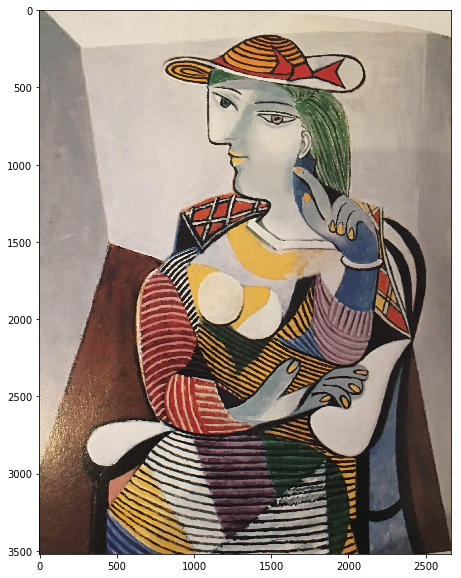

In [17]:
# Dama image (Picasso)
image_path = image_dir4+image_fns4[0]
# Object detection
image = yolov3_read_and_show(image_path)

YOLOv3 predicting image_path: ./data/images/art/dama_sentada.jpg
person: 80.92698454856873%
chair: 53.65053415298462%


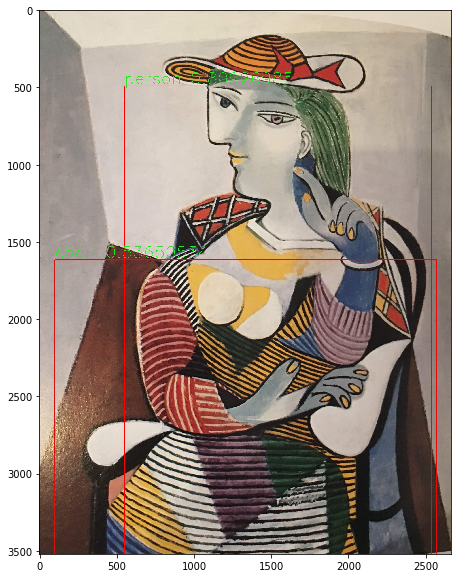

In [18]:
# Object detection
boxes = yolov3_detect_and_show(image, image_path)

In [19]:
# Print yolo boxes and classes
objects_total = print_predictions(boxes, labels, obj_thresh)
print("\nobjects_total:", objects_total)

Predictions on image (object threshold: 0.5)
object 1 box 296 - person (class 0): 80.92698454856873%
object 2 box 371 - chair (class 56): 53.65053415298462%

objects_total: 2


## Run YOLOv3 Object Detection - Dog



image_path: ./data/images/dog.jpg
image.shape: (576, 768, 3)


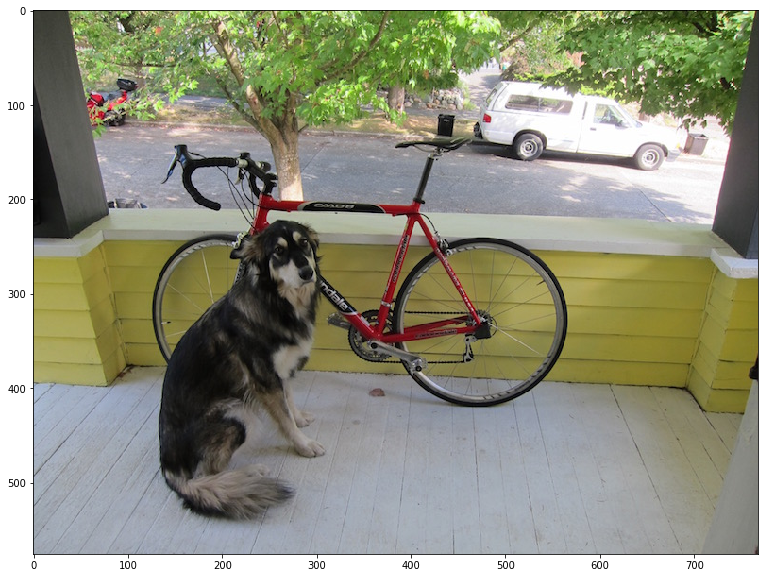

In [20]:
# Dog image (Redmon)
image_path = image_dir1+image_fns1[4]
# Object detection
image = yolov3_read_and_show(image_path)

YOLOv3 predicting image_path: ./data/images/dog.jpg
bicycle: 99.34678077697754%
dog: 98.6376702785492%
truck: 92.89805889129639%


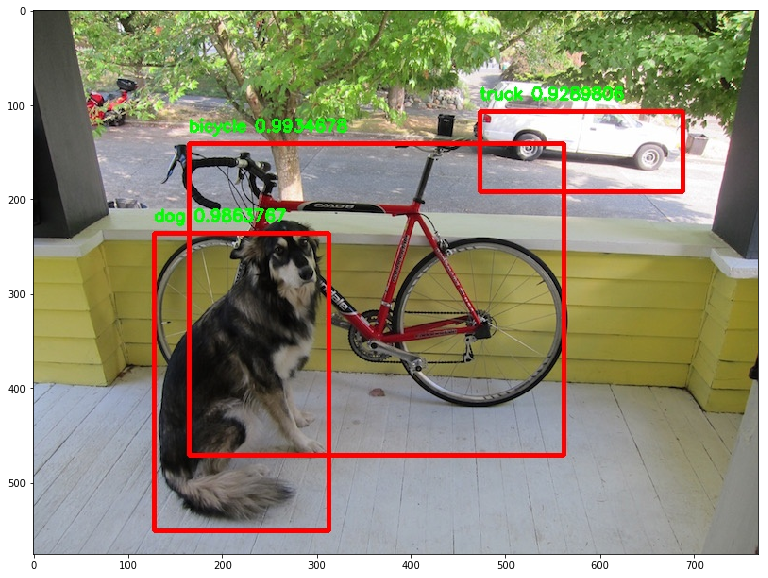

In [21]:
# Object detection
boxes = yolov3_detect_and_show(image, image_path)

# Notes

YOLOv3 Training is done in a separate Jupyter notebook. 

* See: `yolov3_object_detector_train.ipynb`.

<!-- YOLOv3 object bounding boxes above are vertically offset by about ydiff = +50px. 
Subtract amount. -->

YOLOv3 model trained using the DarkNet code base on the MSCOCO dataset. 

Output of the model:
* encoded candidate bounding boxes from three different grid scale sizes
* bounding boxes defined in the context of anchor boxes, <br/>
chosen based on an analysis of the size of objects in the MSCOCO dataset.
